In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(os.path.join(".","data",'hotel_bookings.csv'))

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015/7/1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015/7/1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015/7/2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015/7/2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015/7/3


In [6]:
data_dic = {}
for i in range(data.shape[1]):
    data_dic[data.columns.values[i]] = set(data.iloc[:, i])
for key in data_dic:
    print(key, data_dic[key])

hotel {'City Hotel', 'Resort Hotel'}
is_canceled {0, 1}
lead_time {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208

### 'children': use babies column to fill na

In [7]:
len(data[data.children >= 0]) / len(data) # the na rate of 'children'

0.9999664963564787

In [8]:
data_temp = data.loc[:, ['children', 'babies']].dropna(axis=0, how='any')

In [9]:
print((data_temp.children - data.babies).describe()) 

count    119386.000000
mean          0.095941
std           0.408018
min         -10.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
dtype: float64


In [10]:
data_temp.corr()

,children,babies
children,1.00000,0.02403
babies,0.02403,1.00000


In [11]:
print(len(data[data.children.isnull()]))

4


In [12]:
data.loc[data.children.isnull(), 'children'] = data.loc[data.children.isnull(), 'babies'] # 因为差距不大，所以用babies填充children的空缺值

### undefined factors---undefined rate is acceptable

In [13]:
print('meal:', len(data[data.meal == 'Undefined']) / len(data))
print('market_segment:', len(data[data.market_segment == 'Undefined']) / len(data))
print('distribution_channel:', len(data[data.distribution_channel == 'Undefined']) / len(data))

meal: 0.009791439819080325
market_segment: 1.6751821760616466e-05
distribution_channel: 4.1879554401541165e-05


### nan factors

In [14]:
print('country:', len(data[data.country.isnull()]) / len(data)) # --- nan rate is acceptable
print('agent:', len(data[data.agent.isnull()]) / len(data)) # --- nan rate is accpetable
print('company:', len(data[data.company.isnull()]) / len(data)) # --- nan rate is not acceptable, delete this factor

country: 0.004087444509590418
agent: 0.13686238378423654
company: 0.943068933746545


In [15]:
data.country = data.country.fillna('Undefined')
data.agent = data.agent.fillna('Undefined')
data.company = data.company.fillna('Undefined')

In [16]:
print('country:', len(data[data.country.isnull()]) / len(data))
print('agent:', len(data[data.agent.isnull()]) / len(data)) 
print('company:', len(data[data.company.isnull()]) / len(data))

country: 0.0
agent: 0.0
company: 0.0


### outlier processing

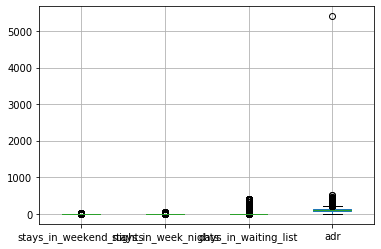

In [17]:
cols = ['stays_in_weekend_nights', 'stays_in_week_nights', 'days_in_waiting_list', 'adr']
data[cols].boxplot()

In [18]:
data[cols].describe()

,stays_in_weekend_nights,stays_in_week_nights,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.927599,2.500302,2.321149,101.831122
std,0.998613,1.908286,17.594721,50.535790
min,0.000000,0.000000,0.000000,-6.380000
25%,0.000000,1.000000,0.000000,69.290000
50%,1.000000,2.000000,0.000000,94.575000
75%,2.000000,3.000000,0.000000,126.000000
max,19.000000,50.000000,391.000000,5400.000000


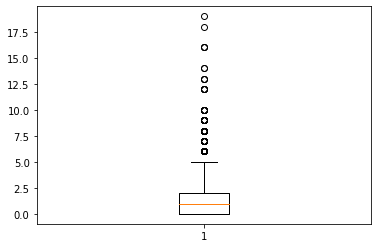

In [19]:
# for stays_in_weekend_nights，stays_in_week_nights，days_in_waiting_list，we think it is reasonable to have somer outliers and do not delete the outliers
plt.boxplot(data.stays_in_weekend_nights)
plt.show()

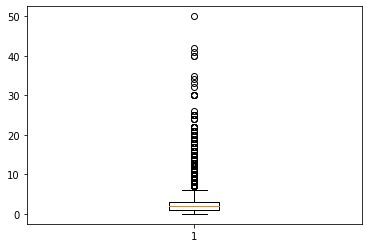

In [20]:
plt.boxplot(data.stays_in_week_nights)
plt.show()

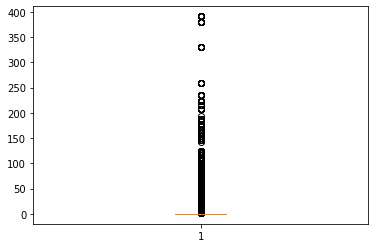

In [21]:
plt.boxplot(data.days_in_waiting_list)
plt.show()

In [22]:
# however, for the adr, we think the price customers paid for the hotel must be a positive price, so we delete the negative adr data.
data[data.adr < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,273,Undefined,0,Transient-Party,-6.38,0,0,Check-Out,2017/3/15


In [23]:
data = data[data.adr > 0]

In [24]:
data.to_csv('clean_data.csv', index=0)

In [25]:
for col in data.columns.values:
    print(col, len(data[data[col].isnull()]) / len(data))

hotel 0.0
is_canceled 0.0
lead_time 0.0
arrival_date_year 0.0
arrival_date_month 0.0
arrival_date_week_number 0.0
arrival_date_day_of_month 0.0
stays_in_weekend_nights 0.0
stays_in_week_nights 0.0
adults 0.0
children 0.0
babies 0.0
meal 0.0
country 0.0
market_segment 0.0
distribution_channel 0.0
is_repeated_guest 0.0
previous_cancellations 0.0
previous_bookings_not_canceled 0.0
reserved_room_type 0.0
assigned_room_type 0.0
booking_changes 0.0
deposit_type 0.0
agent 0.0
company 0.0
days_in_waiting_list 0.0
customer_type 0.0
adr 0.0
required_car_parking_spaces 0.0
total_of_special_requests 0.0
reservation_status 0.0
reservation_status_date 0.0
